In [1]:
from wdlen import wordlenth
from nltk.corpus.reader import CHILDESCorpusReader
import nltk
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
corpus_root = nltk.data.find( 'corpora/CHILDES/Eng-NA-MOR/')
Manchester = CHILDESCorpusReader(corpus_root, 'Manchester/.*.xml')
wdlen = wordlenth(Manchester)

In [5]:
df = pd.DataFrame(wdlen).dropna()
df = df[['fname', 'age', 'one','two','three', 'four', 'five']]
df

,fname,age,one,two,three,four,five
0,Manchester/anne/anne01a.xml,22,130,56,12,0,0
1,Manchester/anne/anne01b.xml,22,177,94,19,0,0
2,Manchester/anne/anne02a.xml,23,192,154,40,5,1
3,Manchester/anne/anne02b.xml,23,222,137,34,4,0
4,Manchester/anne/anne03a.xml,23,263,84,38,8,2
5,Manchester/anne/anne03b.xml,23,181,85,29,13,1
6,Manchester/anne/anne04a.xml,23,257,105,47,12,5
7,Manchester/anne/anne04b.xml,23,217,83,45,9,2
8,Manchester/anne/anne05a.xml,24,177,112,52,11,2
9,Manchester/anne/anne05b.xml,24,215,130,44,13,0


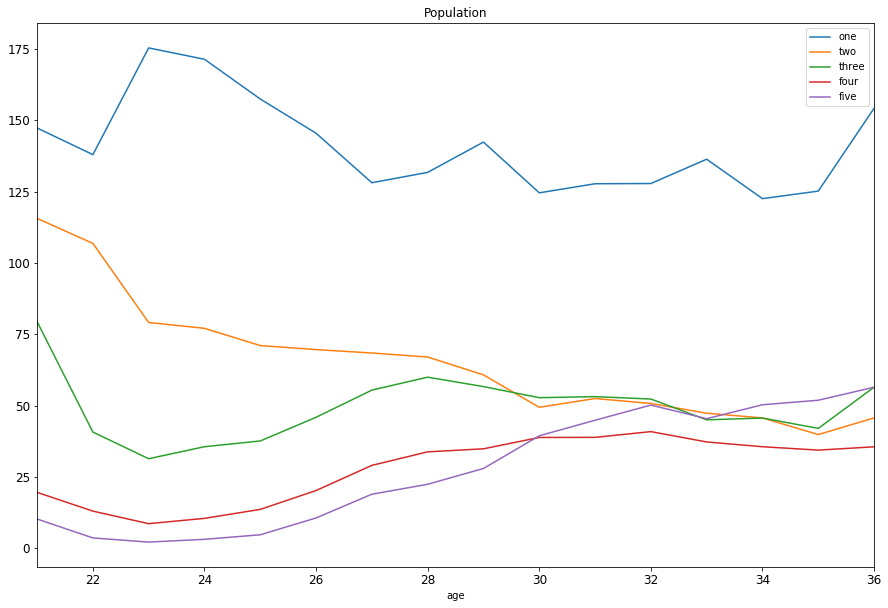

In [6]:
plt.figure()
df2 = df.groupby('age').mean().reset_index()
df2.set_index('age').plot.line(rot=0, title='Population', figsize=(15,10), fontsize=12)
plt.show()